In [166]:
# import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime
from datetime import timedelta
import math
import random
import timeit
import pickle

In [167]:
marburg = pd.read_pickle('../0_data/marburg_clean.pkl')
duisburg = pd.read_pickle('../0_data/duisburg_clean.pkl')

In [168]:
duisburg = duisburg.sort_values(['datetime'])

In [169]:
duisburg = duisburg.reset_index()

In [189]:
def calc_length(df):
    # hier wird die differenz zwischen den datimes berechnet
    # es ist wichtig, dass davor sortiert wurde
    # periods = -1, heisst dass die differenz immer mit der row darunter berechnet wird
    df['diff'] = df['datetime'].diff(periods=-1)
    return df

In [171]:
duisburg_diff = duisburg.groupby(['b_number'], sort=False).apply(calc_length)

In [172]:
# beispiel um zu gucken ob es geklappt hat
# dadurch dass wir  vergangenheit - zukunft gerechnet haben sehen die timedeltas was seltsam aus
# -1 days +21:28 bedeuter nichts anderes als -3 1/2 stunden
# wir sehen hier, dass logischerweise der letzte eintrag immer NaT hat
duisburg_diff.sort_values(['b_number','datetime'])[duisburg_diff['b_number']==683]

C:\Dev\Programme\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,datetime,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff
27613,2019-05-27 14:48:00,2019-05-27,14:48:00,683,duisburg,"(51.426, 6.7649)","(51.4283, 6.7856)",0,14,73,-1 days +21:28:00
27675,2019-05-27 17:20:00,2019-05-27,17:20:00,683,duisburg,"(51.4283, 6.7856)","(51.4314, 6.7591)",0,17,44,-1 days +09:01:00
27829,2019-05-28 08:19:00,2019-05-28,08:19:00,683,duisburg,"(51.4314, 6.7591)","(51.4333, 6.7684)",1,8,6,-8 days +23:06:00
30425,2019-06-04 09:13:00,2019-06-04,09:13:00,683,duisburg,"(51.4341, 6.7627)","(51.4314, 6.7591)",1,9,12,-1 days +00:05:00
30907,2019-06-05 09:08:00,2019-06-05,09:08:00,683,duisburg,"(51.4314, 6.7591)","(51.4393, 6.7829)",2,9,52,-1 days +22:33:00
30940,2019-06-05 10:35:00,2019-06-05,10:35:00,683,duisburg,"(51.4393, 6.7829)","(51.4306, 6.7735)",2,10,41,NaT


In [173]:
def fill_NaT(row):
    if pd.isnull(row['diff']):
        end = pd.Timestamp(year=2020, month=1, day=1)
        row['diff'] = end - row['datetime']
    return row

In [174]:
# wir fuellen hier die NaT values auf mit dem letzten Datum, von dem wir Daten haben
duisburg_diff = duisburg_diff.apply(fill_NaT, axis=1)

In [175]:
duisburg_diff[duisburg_diff_test['b_number']==683]

,datetime,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff
27613,2019-05-27 14:48:00,2019-05-27,14:48:00,683,duisburg,"(51.426, 6.7649)","(51.4283, 6.7856)",0,14,73,-1 days +21:28:00
27675,2019-05-27 17:20:00,2019-05-27,17:20:00,683,duisburg,"(51.4283, 6.7856)","(51.4314, 6.7591)",0,17,44,-1 days +09:01:00
27829,2019-05-28 08:19:00,2019-05-28,08:19:00,683,duisburg,"(51.4314, 6.7591)","(51.4333, 6.7684)",1,8,6,-8 days +23:06:00
30425,2019-06-04 09:13:00,2019-06-04,09:13:00,683,duisburg,"(51.4341, 6.7627)","(51.4314, 6.7591)",1,9,12,-1 days +00:05:00
30907,2019-06-05 09:08:00,2019-06-05,09:08:00,683,duisburg,"(51.4314, 6.7591)","(51.4393, 6.7829)",2,9,52,-1 days +22:33:00
30940,2019-06-05 10:35:00,2019-06-05,10:35:00,683,duisburg,"(51.4393, 6.7829)","(51.4306, 6.7735)",2,10,41,209 days 13:25:00


In [180]:
duisburg_diff['is_broken'] = duisburg_diff['diff'] < timedelta(days=-7) 

In [181]:
duisburg_diff

,datetime,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff,is_broken
0,2019-01-20 00:31:00,2019-01-20,00:31:00,51129,duisburg,"(51.4393, 6.7829)","(51.4294, 6.7772)",6,0,10,-1 days +22:37:00,False
1,2019-01-20 01:11:00,2019-01-20,01:11:00,50113,duisburg,"(51.4319, 6.7784)","(51.4341, 6.7627)",6,1,13,-165 days +19:00:00,True
2,2019-01-20 01:21:00,2019-01-20,01:21:00,51465,duisburg,"(51.4281, 6.7792)","(51.432, 6.7712)",6,1,121,-2 days +18:43:00,False
3,2019-01-20 01:54:00,2019-01-20,01:54:00,51129,duisburg,"(51.4304, 6.7748)","(51.4223, 6.7918)",6,1,9,-1 days +19:41:00,False
4,2019-01-20 05:37:00,2019-01-20,05:37:00,51299,duisburg,"(51.4294, 6.7772)","(51.4245, 6.7815)",6,5,6,-1 days +17:31:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
131914,2020-01-20 22:48:00,2020-01-20,22:48:00,52171,duisburg,"(51.4283, 6.7856)","(51.4294, 6.7772)",0,22,6,-20 days +01:12:00,True
131915,2020-01-20 23:22:00,2020-01-20,23:22:00,51585,duisburg,"(51.4558, 6.735)","(51.4367, 6.7576)",0,23,15,-20 days +00:38:00,True
131916,2020-01-20 23:24:00,2020-01-20,23:24:00,501570,duisburg,"(51.4319, 6.7784)","(51.4302, 6.762)",0,23,7,-20 days +00:36:00,True
131917,2020-01-20 23:33:00,2020-01-20,23:33:00,501533,duisburg,"(51.4104, 6.7521)","(51.4178, 6.7575)",0,23,18,-20 days +00:27:00,True


In [183]:
duisburg_diff = duisburg_diff.set_index('datetime')

In [186]:
duisburg_diff.resample('h')['is_broken'].sum()

datetime
2019-01-20 00:00:00     0.0
2019-01-20 01:00:00     1.0
2019-01-20 02:00:00     0.0
2019-01-20 03:00:00     0.0
2019-01-20 04:00:00     0.0
                       ... 
2020-01-20 19:00:00    10.0
2020-01-20 20:00:00    13.0
2020-01-20 21:00:00    10.0
2020-01-20 22:00:00     5.0
2020-01-20 23:00:00     4.0
Freq: H, Name: is_broken, Length: 8784, dtype: float64

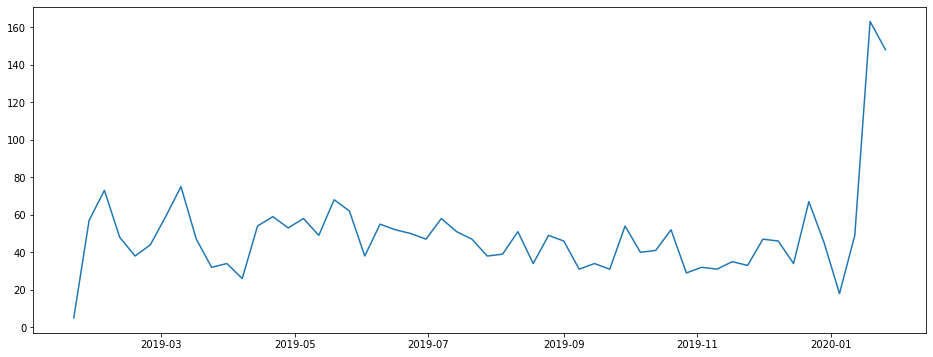

In [188]:

fig,ax = plt.subplots(figsize=(16,6))

ax.plot(duisburg_diff.resample('W')['is_broken'].sum())

plt.show()
